<a href="https://colab.research.google.com/github/Flamingo23456/AI_bootcamp/blob/main/cifar10_mlp_reg_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import fashion_mnist,cifar100
from keras.utils import to_categorical
from keras.optimizers import Adam,SGD
import matplotlib.pyplot as plt
from keras import regularizers


In [ ]:
(x_train,y_train),(x_test,y_test)=cifar100.load_data()

In [ ]:
#normalize
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0


In [ ]:
#to categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
#architecture
model_base=Sequential()
model_base.add(Flatten(input_shape=(32,32,3)))
model_base.add(Dense(1024,activation='relu'))
model_base.add(Dense(512,activation='relu'))
model_base.add(Dense(256,activation='relu'))
model_base.add(Dense(128,activation='relu'))
model_base.add(Dense(64,activation='relu'))
model_base.add(Dense(100,activation='softmax'))


In [ ]:
#compile
model_base.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


In [ ]:
#train
re=model_base.fit(x_train,y_train,
               epochs=30,
               batch_size=128,
               validation_split=0.2)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.0195 - loss: 4.5415 - val_accuracy: 0.0623 - val_loss: 4.1144
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0755 - loss: 4.0458 - val_accuracy: 0.0997 - val_loss: 3.9047
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1017 - loss: 3.8765 - val_accuracy: 0.1075 - val_loss: 3.8453
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1212 - loss: 3.7423 - val_accuracy: 0.1328 - val_loss: 3.7019
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1399 - loss: 3.6294 - val_accuracy: 0.1465 - val_loss: 3.6409
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1521 - loss: 3.5627 - val_accuracy: 0.1528 - val_loss: 3.5849
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1695 - loss: 3.4737 - val_accuracy: 0.1641 - val_loss: 3.5033
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1828 - loss: 3.3878 - val_accuracy: 0

In [ ]:
#evaluate
loss,test_accuracy=model_base.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2115 - loss: 3.7023
test loss:3.705702066421509
test accuracy:0.2134999930858612


TypeError: 'str' object is not callable

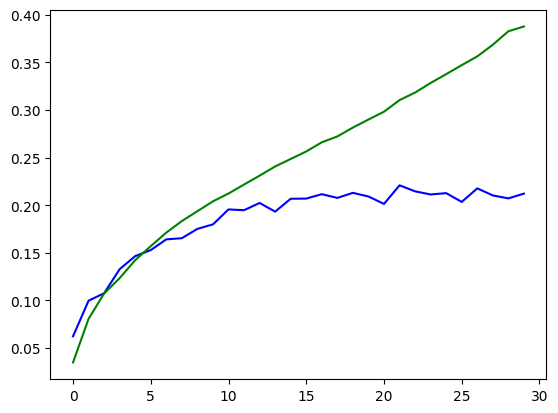

In [ ]:
#visulaisation

plt.plot(re.history['val_accuracy'], label="Validation Accuracy", color="blue")
plt.plot(re.history['accuracy'], label="Training Accuracy", color="green")
plt.title("Train Accuracy vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
#*************************************************************************************************************************


In [ ]:
#Model 2 with L2 regularizer (le-4) and dropout
#architecture
model_le4=Sequential()
model_le4.add(Flatten(input_shape=(32,32,3)))
model_le4.add(Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(100,activation='softmax'))


In [ ]:
#compile
model_le4.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


In [ ]:
#train
history_model2=model_le4.fit(x_train,y_train,
               epochs=30,
               batch_size=128,
               validation_split=0.2)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.0110 - loss: 4.8110 - val_accuracy: 0.0213 - val_loss: 4.5319
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0306 - loss: 4.4151 - val_accuracy: 0.0603 - val_loss: 4.1740
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0667 - loss: 4.0846 - val_accuracy: 0.0736 - val_loss: 4.0520
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0829 - loss: 3.9683 - val_accuracy: 0.0902 - val_loss: 3.9663
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1025 - loss: 3.8599 - val_accuracy: 0.1142 - val_loss: 3.8164
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1242 - loss: 3.7553 - val_accuracy: 0.1152 - val_loss: 3.8385
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1395 - loss: 3.6821 - val_accuracy: 0.1277 - val_loss: 3.7331
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1462 - loss: 3.6180 - val_accuracy: 0

In [ ]:
#evaluate
loss,test_accuracy=model_le4.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2183 - loss: 3.4255
test loss:3.419477701187134
test accuracy:0.22059999406337738


TypeError: 'str' object is not callable

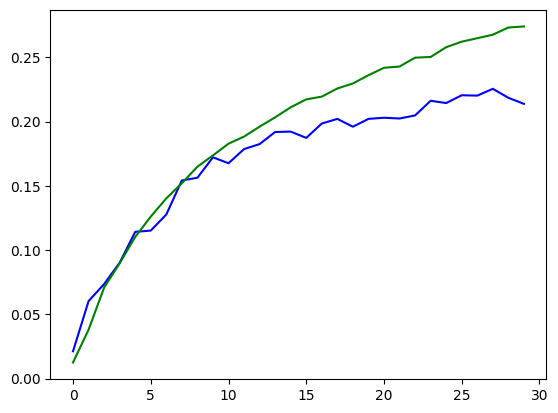

In [ ]:
#visulaisation
plt.plot(history_model2.history['val_accuracy'],label="validation accuracy",color="blue")
plt.plot(history_model2.history['accuracy'],label="train accuracy",color="green")
plt.title("Train_accuracy vs Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#**********************************************************************************************************

In [ ]:
#MODEL 3 with l2 regularizer (le-2) and dropout
#architecture
model_le2=Sequential()
model_le2.add(Flatten(input_shape=(32,32,3)))
model_le2.add(Dense(1024,activation='relu',
                    kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(100,activation='softmax'))

In [ ]:
#compile
model_le2.compile(optimizer=Adam(learning_rate=0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
#train
history_model3=model_le2.fit(x_train,y_train,
               epochs=30,
               batch_size=128,
               validation_split=0.2)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.0098 - loss: 10.4052 - val_accuracy: 0.0083 - val_loss: 4.6107
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0109 - loss: 4.6072 - val_accuracy: 0.0083 - val_loss: 4.6065
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0103 - loss: 4.6051 - val_accuracy: 0.0077 - val_loss: 4.6069
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0111 - loss: 4.6051 - val_accuracy: 0.0077 - val_loss: 4.6072
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0105 - loss: 4.6050 - val_accuracy: 0.0077 - val_loss: 4.6074
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0122 - loss: 4.6051 - val_accuracy: 0.0077 - val_loss: 4.6076
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0102 - loss: 4.6050 - val_accuracy: 0.0077 - val_loss: 4.6077
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0103 - loss: 4.6051 - val_accuracy: 

In [ ]:
#evaluate
loss,test_accuracy=model_le2.evaluate(x_test,y_test)
print(f"test accuracy:{test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0104 - loss: 4.6053
test accuracy:0.009999999776482582


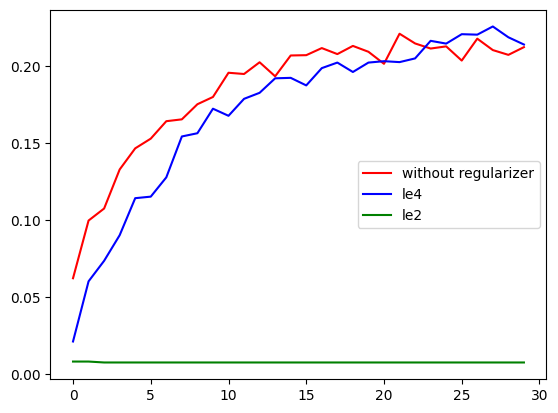

In [ ]:
#visualization
plt.plot(re.history['val_accuracy'],
         label='without regularizer',
         color='red')
plt.plot(history_model2.history['val_accuracy'],
         label='le4',
         color='blue')
plt.plot(history_model3.history['val_accuracy'],
         label='le2',
         color='green')
plt.title='validation accuracy'
plt.xlabel='epochs'
plt.ylabel='accuracy'
plt.legend()
plt.show()
